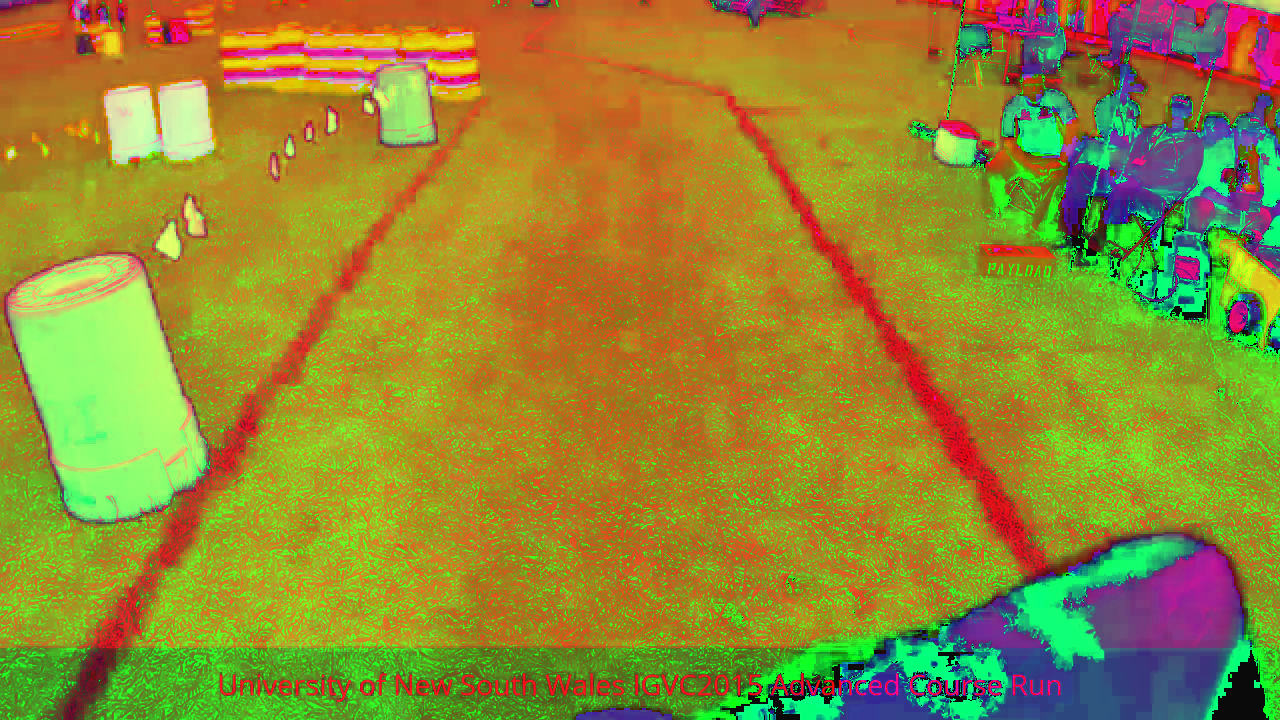

AttributeError: ignored

In [39]:
#importing required libraries
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
#reading template image
img=cv2.imread('templatenew.jpg')
#converting to hsv colorspace
hsv_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist_img=cv2.calcHist([hsv_img],[0,1],None,[180,256],[0,180,0,256])
cv2.normalize(hist_img,hist_img,0,255,cv2.NORM_MINMAX)
#capturing video
vid=cv2.VideoCapture('video1.mp4')
#using while loop to read frame by frame
while(vid.isOpened()):
  ret, frame=vid.read()
  frame_hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
  res=cv2.calcBackProject([frame_hsv],[0,1],hist_img,[0,180,0,256],1)
  disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
  res1=cv2.filter2D(res, -1, disc, res)
  ret,thresh1=cv2.threshold(res1,10,255,cv2.THRESH_TRUNC)
  final = cv2.merge((thresh1,thresh1,thresh1))
#applying bitwise or on target image and final image 
  result = cv2.bitwise_or(frame_hsv, final)
  #displaying output
  cv2_imshow(result)
  if(cv2.waitKey(25)&0xFF==ord('q')):
    break
vid.release()
cv2.destroyAllWindows()
  